In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [21]:
test_interval = 100

res = {}
for test_ind in range(1, 220):
    epoch = int(test_ind * test_interval)
    df = pd.read_csv(
        f"../data/staghunt_small_room_size7_regen1_v2_test_interval10_20251023-125008/unit_test/probe_test_epoch_{epoch}_group.csv"
    )
    for col in df.columns[3:]:
        if test_ind == 1:
            res[col] = [df[col].mean()]
        else:
            res[col].append(df[col].mean())
res = pd.DataFrame(res)

In [18]:
folders = [
    "staghunt_small_room_size1_regen1_v2_test_interval10_20251023-124930",
    "staghunt_small_room_size3_regen1_v2_test_interval10_20251023-124949",
    "staghunt_small_room_size7_regen1_v2_test_interval10_20251023-125008",
]

test_interval = 100
num_tests = 2200

res = {"room_size": [], "test_ind": []}
room_size = [1, 3, 7]
for idx, folder in enumerate(folders):
    for test_ind in range(1, num_tests):
        epoch = int(test_ind * test_interval)
        df = pd.read_csv(
            f"../data/{folder}/unit_test/probe_test_epoch_{epoch}_group.csv"
        )
        for col in df.columns[3:]:
            if test_ind == 1 and idx == 0:
                res[col] = [df[col].mean()]
            else:
                res[col].append(df[col].mean())
    res["test_ind"].extend([x for x in range(1, num_tests)])
    res["room_size"].extend([room_size[idx]] * (num_tests - 1))
res = pd.DataFrame(res)

In [22]:
folders = ["test_oct28_20251028-001430"]

test_interval = 100
num_tests = 1900

res = {"test_ind": []}
for idx, folder in enumerate(folders):
    for test_ind in range(1, num_tests):
        agent_data = {}
        for agent_ind in range(0, 3):
            epoch = int(test_ind * test_interval)
            df = pd.read_csv(
                f"../data/{folder}/unit_test/probe_test_epoch_{epoch}_agent_{agent_ind}.csv"
            )
            for col in df.columns[4:]:
                if agent_ind == 0:
                    agent_data[col] = [df[col].mean()]
                else:
                    agent_data[col].append(df[col].mean())
        if test_ind == 1:
            for key, item in agent_data.items():
                res[key] = [np.mean(item)]
        else:
            for key, item in agent_data.items():
                res[key].append(np.mean(item))

    res["test_ind"].extend([x for x in range(1, num_tests)])
res = pd.DataFrame(res)

In [25]:
folders = [
    # "test_area_attack_3a_Nov03_with_epsilon1_20251103-150916",
    # "test_area_attack_3a_Nov03_with_epsilon0_20251103-150829"
    # "test_line_attack_3a_Nov03_with_epsilon1_20251103-150942",
    # "test_line_attack_3a_Nov03_with_epsilon0_20251103-150759"
    # "test_line_attack_3a_Nov03_with_epsilon1_control_test_stagHealth10_20251104-123658"
    # "test_area_attack_3a_Nov04_with_epsilon1_20251104-191240",
    # "test_area_attack_3a_Nov04_with_epsilon0_20251104-191343",
    # "test_line_attack_3a_Nov04_with_epsilon0_20251104-191524",
    # "test_line_attack_3a_Nov04_with_epsilon1_20251104-191547",
    # "test_vis5_area_attack_3a_Nov04_with_epsilon0_20251105-114054",
    # "test_vis5_area_attack_3a_Nov04_with_epsilon1_20251105-114122",
    # "test_vis5_area_attack_3a_Nov04_with_epsilon1_control_test_stagHealth10_20251105-114239",
    # "test_vis5_line_attack_3a_Nov04_with_epsilon0_20251105-114026",
    # "test_vis5_line_attack_3a_Nov04_with_epsilon1_20251105-114004",
    "test_vis4_area_attack_3a_Nov04_with_epsilon1_20251105-175342"
]

test_interval = 10
num_tests = 1100
num_a = 3

res = {"test_ind": [], "cond_idx": []}
for idx, folder in enumerate(folders):
    for test_ind in range(1, num_tests):
        agent_data = {}
        for agent_ind in range(0, num_a):
            for cond in ["upper", "lower"]:
                epoch = int(test_ind * test_interval)
                df = pd.read_csv(
                    f"../data/{folder}/unit_test/test_intention_epoch_{epoch}_agent_{agent_ind}_{cond}.csv"
                )
                for col in df.columns[2:]:
                    if col not in list(agent_data.keys()):
                        agent_data[col] = [df[col].mean()]
                    else:
                        agent_data[col].append(df[col].mean())
        if test_ind == 1 and idx == 0:
            for key, item in agent_data.items():
                res[key] = [np.mean(item)]
        else:
            for key, item in agent_data.items():
                res[key].append(np.mean(item))

    res["test_ind"].extend([x for x in range(1, num_tests)])
    res["cond_idx"].extend([idx for _ in range(1, num_tests)])
res = pd.DataFrame(res)

In [ ]:
for key, item in res.items():
    print(len(item))

# Add rolling metrics

In [ ]:
# add rolling metrics
metrics = [
    "attacks_to_hares",
    "attacks_to_stags",
    "punishments_given",
    "punishments_received",
    "total_reward",
    "attack_cost_paid",
    "punish_cost_paid",
    "resources_defeated",
    "stags_defeated",
    "hares_defeated",
    "shared_rewards_received",
    "stag_to_hare_ratio",
]
wsize = 1
res_rolling = res.copy()
# add stag-to-hare ratio
res_rolling["stag_to_hare_ratio"] = (
    res_rolling["attacks_to_stags"] / res_rolling["attacks_to_hares"]
)
for metric in metrics:
    res_rolling[f"{metric}_rolling"] = (
        res_rolling.groupby("room_size")[metric]
        .rolling(wsize)
        .mean()
        .reset_index(drop=True)
    )

In [ ]:
# add rolling metrics
metrics = [
    "attacks_to_hares",
    "attacks_to_stags",
    "punishments_given",
    "punishments_received",
    "total_reward",
    "attack_cost_paid",
    "punish_cost_paid",
    "resources_defeated",
    "stags_defeated",
    "hares_defeated",
    "shared_rewards_received",
    "stag_to_hare_ratio",
]
wsize = 20
res_rolling = res.copy()
# add stag-to-hare ratio
res_rolling["stag_to_hare_ratio"] = (
    res_rolling["attacks_to_stags"] / res_rolling["attacks_to_hares"]
)
for metric in metrics:
    res_rolling[f"{metric}_rolling"] = (
        res_rolling[metric].rolling(wsize).mean().reset_index(drop=True)
    )

In [26]:
metrics = [
    "q_val_forward",
    "q_val_backward",
    "q_val_step_left",
    "q_val_step_right",
    "q_val_attack",
    "weight_facing_stag",
    "weight_facing_hare",
    "ratio_facing_stag_vs_hare",
]
wsize = 10
res_rolling = res.copy()
res_rolling["ratio_facing_stag_vs_hare"] = (
    res_rolling["weight_facing_stag"] / res_rolling["weight_facing_hare"]
)
for metric in metrics:
    res_rolling[f"{metric}_rolling"] = (
        res_rolling.groupby("cond_idx")[metric]
        .rolling(wsize)
        .mean()
        .reset_index(drop=True)
    )

In [208]:
res_rolling

,test_ind,cond_idx,q_val_forward,q_val_backward,q_val_step_left,q_val_step_right,q_val_attack,weight_facing_stag,weight_facing_hare,ratio_facing_stag_vs_hare,q_val_forward_rolling,q_val_backward_rolling,q_val_step_left_rolling,q_val_step_right_rolling,q_val_attack_rolling,weight_facing_stag_rolling,weight_facing_hare_rolling,ratio_facing_stag_vs_hare_rolling
0,1,0,0.029953,0.043160,0.037559,0.040600,0.186922,0.194552,0.193472,1.005583,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,0.060310,0.075341,0.067530,0.080932,0.239979,0.194000,0.192993,1.005215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,0,0.230894,0.218776,0.238991,0.249490,0.390607,0.195551,0.195176,1.001921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,0,0.288528,0.283341,0.276123,0.274713,0.490293,0.190028,0.189915,1.000595,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,0,0.548752,0.534809,0.559867,0.540130,0.789062,0.190524,0.190194,1.001733,0.231687,0.231085,0.236014,0.237173,0.419373,0.192931,0.192350,1.003009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,0,5.713761,5.509821,5.591926,5.576272,5.506036,0.245749,0.164458,1.494298,5.744944,5.480419,5.592060,5.529015,5.477608,0.241436,0.164617,1.469539
495,496,0,5.633429,5.454468,5.595095,5.452744,5.499986,0.248519,0.157892,1.573976,5.740167,5.472989,5.609194,5.518495,5.496113,0.244591,0.162185,1.510607
496,497,0,5.673571,5.478404,5.533324,5.497814,5.480807,0.240171,0.161251,1.489419,5.725199,5.483889,5.574585,5.526321,5.484426,0.240850,0.163132,1.477684
497,498,0,5.621574,5.424801,5.553413,5.455621,5.431028,0.238985,0.167100,1.430193,5.693166,5.470323,5.571557,5.507100,5.484082,0.241764,0.162743,1.486383


# Plot

In [ ]:
sns.lineplot(
    x="test_ind",
    y="weight_facing_hare_rolling",
    data=res_rolling,
    label="weight_facing_hare",
)
sns.lineplot(
    x="test_ind",
    y="weight_facing_stag_rolling",
    data=res_rolling,
    label="weight_facing_stag",
)

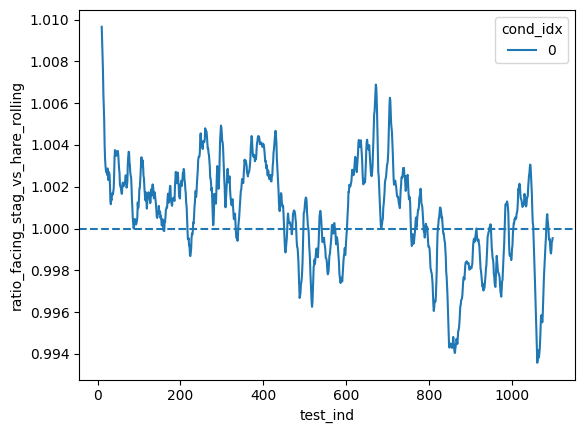

In [27]:
sns.lineplot(
    x="test_ind",
    y="ratio_facing_stag_vs_hare_rolling",
    hue="cond_idx",
    data=res_rolling,
)
plt.axhline(y=1, linestyle="--")